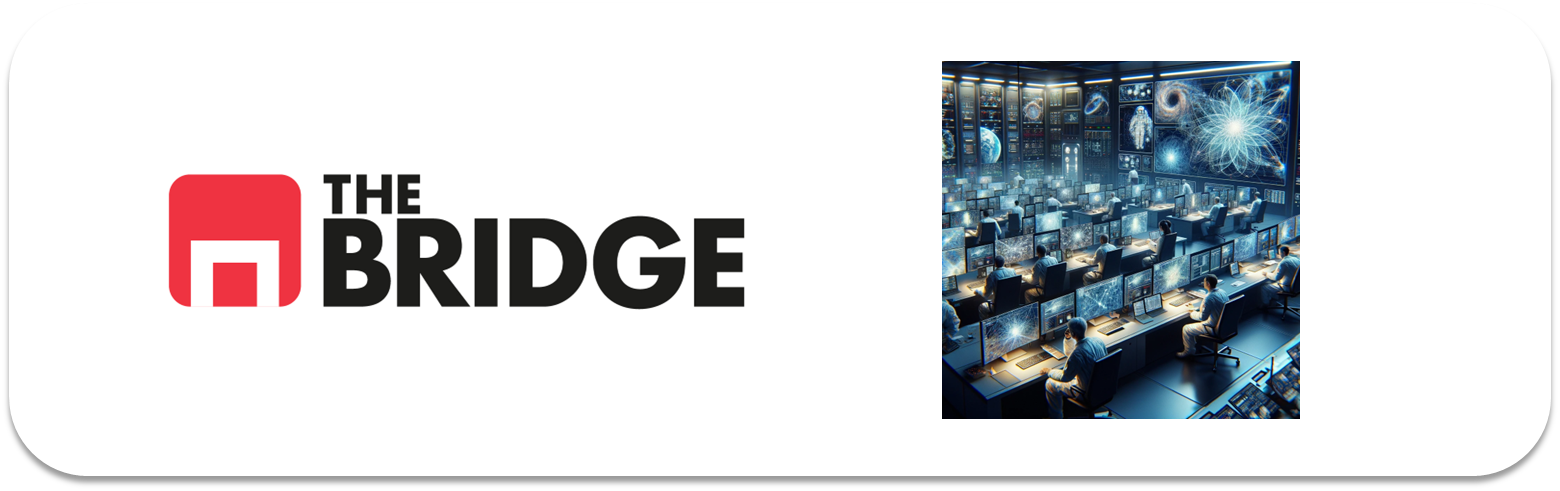

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix
import keras
import cv2

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



---

## 1. Carga de datos

In [27]:
# instanciamos las rutas de las imágenes    
# he tenido que añadir dos directorios para ordenar las carpetas y diferenciarlas de train y test para poder seguir adelante con el ejercicio

ROOT_PATH = './data/'
TRAIN_PATH = ROOT_PATH + "train/"
TEST_PATH = ROOT_PATH + "test/"



In [28]:
# utilizamos la función de los ejercicios del workout

def read_data(directorio, reshape_dim = (32,32)):
    X = [] 
    y = []
    for folder in os.listdir(directorio):
        print(folder)
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(image)
                y.append(file) # necesitamos que la 'y' substraiga los nombres de los archivos y no del folder

    return np.array(X),np.array(y)

In [29]:
X_train, y_train = read_data(TRAIN_PATH)
X_test, y_test = read_data(TEST_PATH)

github_train_0
github_train_1
github_train_2
github_train_3
github_test


In [30]:
X_train

array([[[[126, 100,  64],
         [118,  92,  53],
         [129, 104,  63],
         ...,
         [ 88,  69,  45],
         [ 98,  40,  25],
         [121,  72,  50]],

        [[113,  92,  61],
         [122, 102,  68],
         [131, 111,  75],
         ...,
         [131,  75,  57],
         [ 99,  53,  23],
         [ 99,  42,  22]],

        [[120,  96,  64],
         [133, 110,  74],
         [126, 103,  63],
         ...,
         [ 79,  25,  12],
         [ 50,  12,   2],
         [ 79,  32,   6]],

        ...,

        [[ 15,  15,  10],
         [ 82,  79,  69],
         [ 73,  67,  51],
         ...,
         [103,  95,  69],
         [ 83,  75,  53],
         [ 98,  92,  60]],

        [[ 97,  99,  88],
         [ 66,  63,  49],
         [ 80,  69,  51],
         ...,
         [ 70,  61,  39],
         [ 88,  79,  61],
         [100,  92,  68]],

        [[ 63,  55,  44],
         [ 64,  55,  39],
         [ 82,  71,  50],
         ...,
         [ 86,  72,  46],
        

In [31]:
y_train # de aqui solo queremos el string 'cat' o 'dog'

array(['cat.1000.jpg', 'cat.10010.jpg', 'cat.10012.jpg', ...,
       'dog.9993.jpg', 'dog.9998.jpg', 'dog.9999.jpg'],
      shape=(4000,), dtype='<U13')

In [32]:
# Usamos split y extraemos el primer componente
labels = np.char.split(y_train, sep='.')
labels = np.array([x[0] for x in labels]) # obtenemos una lista con el primer elemento del split anterior
y_train = np.array(labels) # convertimos la lista en numpy array
y_train

array(['cat', 'cat', 'cat', ..., 'dog', 'dog', 'dog'],
      shape=(4000,), dtype='<U3')

In [33]:
# hacemos lo mismo con test

labels = np.char.split(y_test, sep='.')
labels = np.array([x[0] for x in labels]) # obtenemos una lista con el primer elemento del split anterior
y_test = np.array(labels) # convertimos la lista en numpy array
y_test

array(['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat',

## 2. Visualización del dataset

In [34]:
# cantidad y shape de datos que contiene cada set-->

print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)

print('X train shape: ', X_test.shape)
print('Y train shape: ', y_test.shape)

X train shape:  (4000, 32, 32, 3)
Y train shape:  (4000,)
X train shape:  (1000, 32, 32, 3)
Y train shape:  (1000,)


In [35]:
# visualización de imágenes, nos traemos otra de las funciones del workout 

def show_images_batch(mascotas, names = [], n_cols = 5, size_scale = 2):
    n_rows = ((len(mascotas) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, mascota in enumerate(mascotas):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(mascota, cmap = "Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

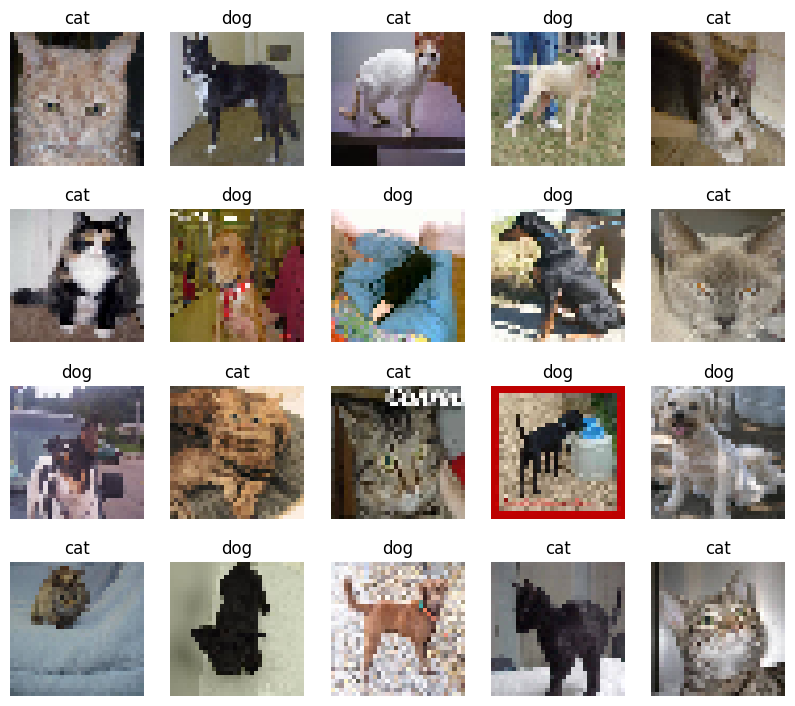

In [36]:
indices = np.random.randint(0,len(X_train),20)
show_images_batch(X_train[indices], names = y_train[indices], n_cols = 5)

## 3. Distribución del target

In [37]:
# el target está completamente balanceado, por lo que nos quedamos con el 'accuracy' como métrica de evaluación

targets = pd.Series(y_train)
targets.value_counts(True)

cat    0.5
dog    0.5
Name: proportion, dtype: float64

## 4. Normalización de las features

In [38]:
X_train = X_train/255
X_test = X_test/255

## 5. Diseño de la topología

In [39]:
# partiendo del diseño de los workouts

capas = [keras.layers.Conv2D(filters = 30, kernel_size = (3, 3),
                            input_shape = (X_train[0].shape), 
                            padding = "same",
                            activation = 'relu'),
         keras.layers.MaxPooling2D(pool_size = (2, 2)),

# Añadimos otra capa de convolución y pooling
         keras.layers.Conv2D(filters = 15, 
                             kernel_size = (3, 3),
                             padding = "same", 
                             activation = 'relu'),
         keras.layers.MaxPooling2D(pool_size = (2, 2)),

# Añadimos una capa de flatten para convertir la salida de la capa de pooling en un vector
         keras.layers.Flatten(),

# Añadimos dos capas densas para la clasificación 
         keras.layers.Dense(units = 150, activation = 'relu'),
         keras.layers.Dense(units = 100, activation = 'relu'),

# Añadimos la capa de salida con 6 neuronas, una por cada clase
         keras.layers.Dense(6, activation = 'softmax')]

# Creamos el modelo
model = keras.Sequential(capas)

c:\Users\tania\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 6. Optimización

In [ ]:
X_train.size # al ser de gran tamaño, nos decamtamos por 'adam'

12288000

In [42]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 30)     │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │       144,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,761 (643.60 KB)

 Trainable params: 164,761 (643.60 KB)

 Non-trainable params: 0 (0.00 B)

## 7. Entrenamiento del modelo

In [44]:
# convertiremos nuestro target en un ordinal 

mapa = {tipo:indice for indice,tipo in enumerate(targets.unique())} # usamos la serie que creamos para ver la distribución del target
mapa

{'cat': 0, 'dog': 1}

In [45]:
# mapeamos

y_train_num = np.array([mapa[y] for y in y_train])
y_test_num = np.array([mapa[y] for y in y_test])

In [48]:
# revolvemos los datos para que el modelo no aprenda en orden de las imágenes
X_train, y_train_num = shuffle(X_train, y_train_num)

In [49]:
history = model.fit(X_train,
                    y_train_num,
                    validation_split = 0.2, # 20% de los datos para validación
                    epochs = 100,
                    batch_size = 32, callbacks= [keras.callbacks.EarlyStopping(patience = 10, restore_best_weights= True)]) # Queremos recuperar los pesos de la mejor de las epocas durante el periodo de patience

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4989 - loss: 0.8628 - val_accuracy: 0.5163 - val_loss: 0.7725
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6022 - loss: 0.6695 - val_accuracy: 0.6550 - val_loss: 0.6327
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6769 - loss: 0.5977 - val_accuracy: 0.6650 - val_loss: 0.6084
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7081 - loss: 0.5510 - val_accuracy: 0.7075 - val_loss: 0.5744
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7453 - loss: 0.5135 - val_accuracy: 0.7175 - val_loss: 0.5558
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7504 - loss: 0.5045 - val_accuracy: 0.7000 - val_loss: 0.5888
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7511 - loss: 0.5012 - val_accuracy: 0.7088 - val_loss: 0.6124
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7767 - loss: 0.4581 - val

Se ha parado en las 20 épocas, pero nuestro modelo mantendrá los mejores pesos (la época num 10) ya que así se lo hemos indicado. A partir de ahí, vemos como aumenta de manera significativa la pérdida de validación. Además, el modelo va sobreajustando pues el accuracy en train no para de aumentar mientras que el accuracy de validación se mantiene alreadedor del 70%.

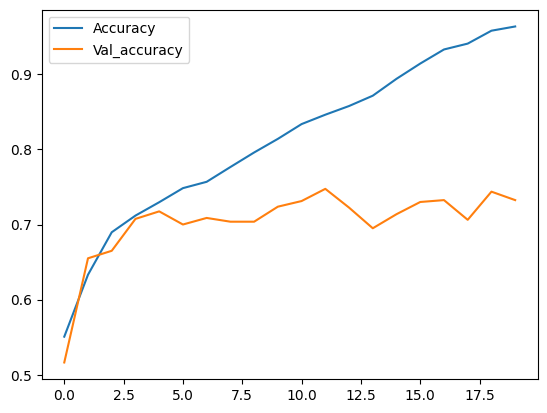

In [ ]:
# Representamos el objeto history
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'Val_accuracy')


plt.legend();   # pasadas las 5 épocas, train accuracy va sobreajustando mientras que val_accuracy se comporta de manera bastante irregular , aunque se mantiene alrededor del 70%

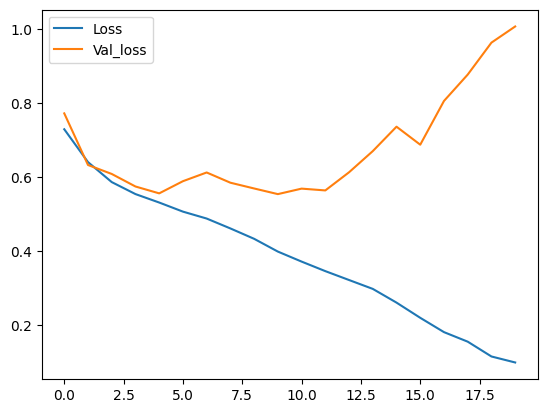

In [53]:
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['val_loss'], label = 'Val_loss')

plt.legend();

## 8. Evaluación del modelo

In [ ]:
model.evaluate(X_test, y_test_num) # no tenemos una gran pérdida al evaluar contra test

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7749 - loss: 0.4693


[0.5376240611076355, 0.7360000014305115]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

         cat       0.71      0.80      0.75       500
         dog       0.77      0.67      0.72       500

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.73      1000
weighted avg       0.74      0.74      0.73      1000



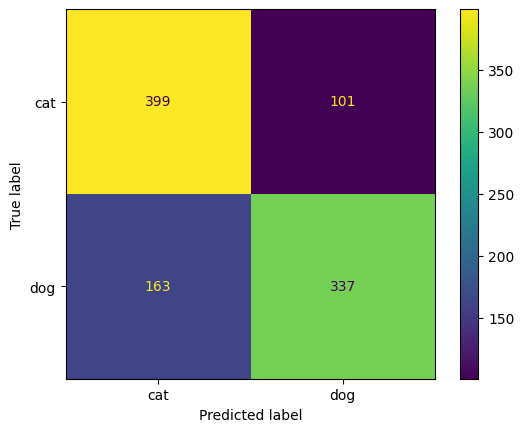

In [57]:
# veamos el classiffication report y matiz de confusión 

y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
inverse_map = {valor:clave for clave,valor in mapa.items()}
y_test_labels = [inverse_map[y] for y in y_test_num]
y_pred_labels = [inverse_map[y] for y in y_pred]
print(classification_report(y_test_labels, y_pred_labels))
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels);

El modelo clasifica mejor la clase 'gato' que la clase 'perro', lo cual se puede observar en la diferencia de recall entre ellos (80% y 67% respectivamente); así como en la distribución de valores absolutos en la matriz de confusión, donde ha clasificado 163 perros como 'gatos' frente a 101 gatos mal clasificados como 'perros'. 

## 9. Nivel de confianza e imágenes mal clasificadas

In [58]:
confianza = [prediction.max() for prediction in model.predict(X_test)]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [59]:
pred_df = pd.DataFrame({"True": y_test_labels, "Predicted": y_pred_labels, "Confianza": confianza})

In [ ]:
error = pred_df["True"] != pred_df["Predicted"]
errores = pred_df[error].sort_values("Confianza", ascending = False)   # sort by 'confianza' para obtener aquellos que mayor probabilidad predicitiva han obtenido (fallidamente)
errores

,True,Predicted,Confianza
680,dog,cat,0.997019
337,cat,dog,0.992457
822,dog,cat,0.983414
867,dog,cat,0.980842
728,dog,cat,0.978995
...,...,...,...
511,dog,cat,0.505184
805,dog,cat,0.504789
808,dog,cat,0.504062
955,dog,cat,0.503477


In [ ]:
# tengo que representar el 10% de cada clase mal clasificada 

# el 10% de las imágenes de perros clasificadas como gatos (16 en total)
len(errores.loc[errores["True"] == 'dog'])*10/100 

16.3

In [ ]:
# el 10% de las imágenes de perros clasificadas como gatos (10 en total)
len(errores.loc[errores["True"] == 'cat'])*10/100 

10.1

In [67]:
es_perro = errores.loc[errores["True"] == 'dog']
es_gato = errores.loc[errores["True"] == 'cat']

In [ ]:
# comprobamos que las predicciones son efectivamente erróneas

for true_label, predicted_label in es_perro.iloc[0:16,0:2].values:
    print(true_label, predicted_label)

dog cat
dog cat
dog cat
dog cat
dog cat
dog cat
dog cat
dog cat
dog cat
dog cat
dog cat
dog cat
dog cat
dog cat
dog cat
dog cat


In [69]:
for true_label, predicted_label in es_gato.iloc[0:10,0:2].values:
    print(true_label, predicted_label)

cat dog
cat dog
cat dog
cat dog
cat dog
cat dog
cat dog
cat dog
cat dog
cat dog


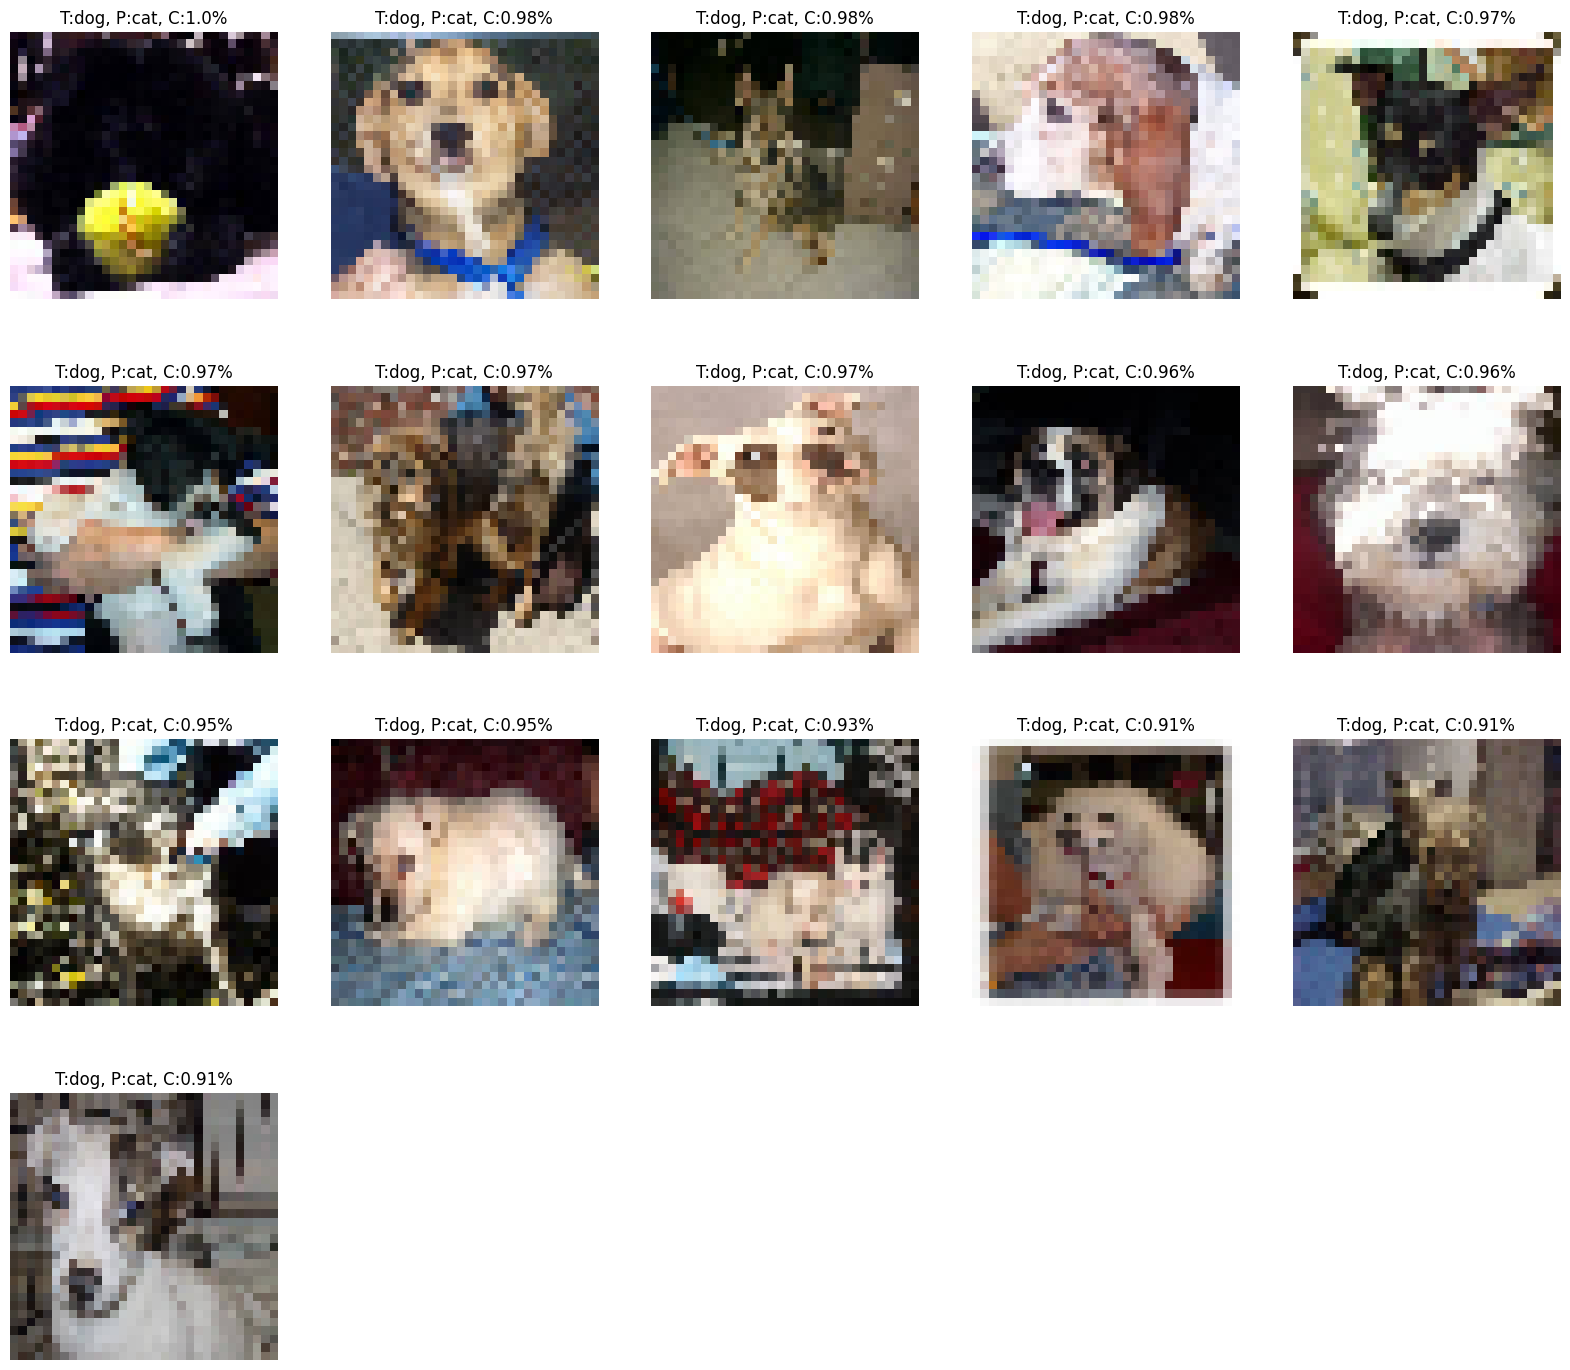

In [ ]:
# pintamos los errores para cada clase

show_images_batch(X_test[es_perro.iloc[0:16].index],names= [f"T:{val1}, P:{val2}, C:{round(val3,2)}%" for val1,val2,val3 in es_perro.iloc[0:16].values], size_scale= 4)

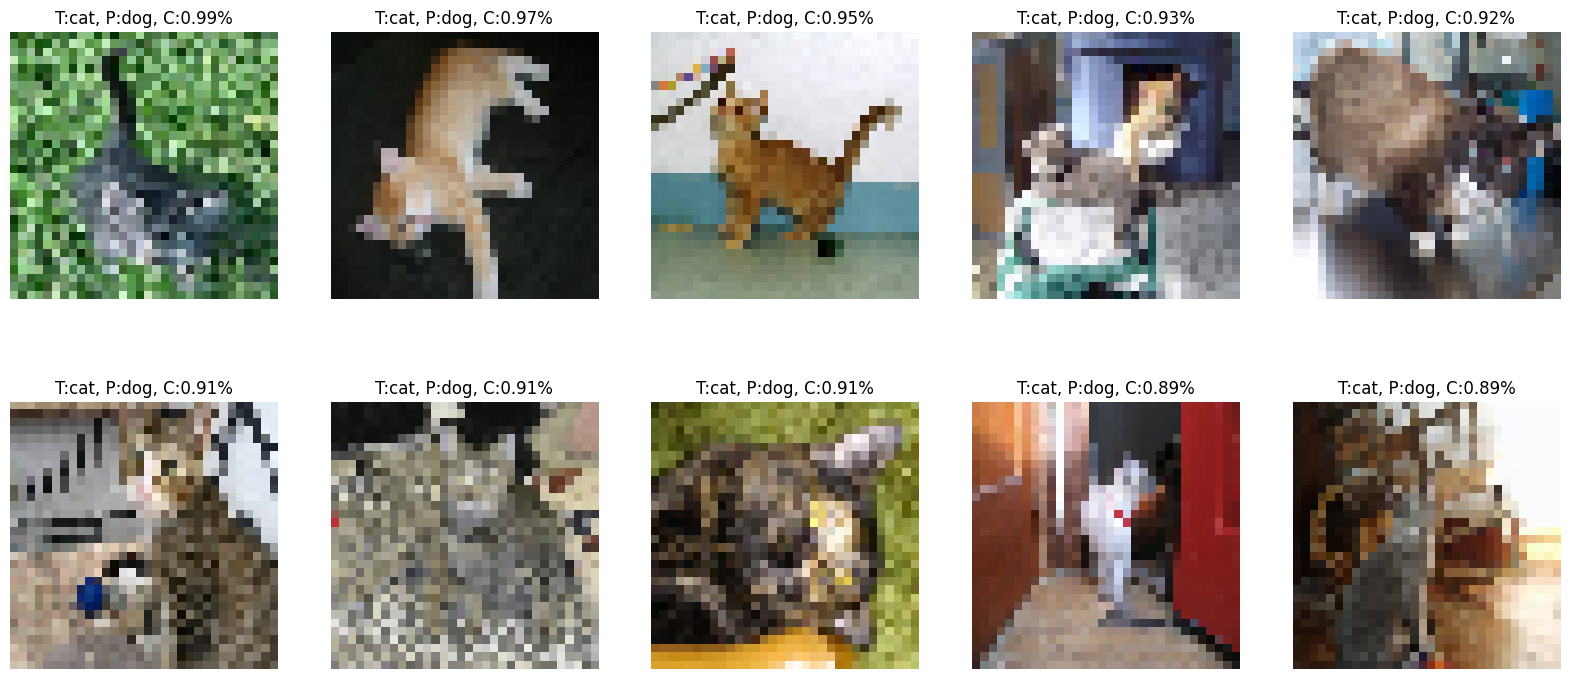

In [71]:

show_images_batch(X_test[es_gato.iloc[0:10].index],names= [f"T:{val1}, P:{val2}, C:{round(val3,2)}%" for val1,val2,val3 in es_gato.iloc[0:10].values], size_scale= 4)